In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy.signal as signal
import scipy.stats as stats
from scipy.interpolate import spline
from statsmodels.robust.scale import mad
import scipy.io as sio
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import hsutil
from importlib import reload
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-paper')

In [4]:
path = 'D:\\Dropbox\\labwork\\behavior\\heatseeking-pilot\\'
data = sio.loadmat(path+'dwell36_topy')
cd = data['cd'][0]
cl = data['cl'][0]
ct = data['ct'][0]
hd = data['hd'][0]
hl = data['hl'][0]
ht = data['ht'][0]
gd = data['gd'][0]
gl = data['gl'][0]
gt = data['gt'][0]

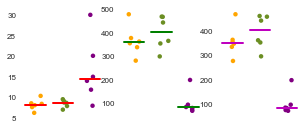

In [11]:
reload(hsutil)
f,ax = plt.subplots(1,3,sharex=True)
pc = ['orange','olivedrab','purple']
f.set_size_inches(5,2)
ax[0] = hsutil.dotplot(np.vstack([cd,hd,gd]),pc=pc,mc='r',ax=ax[0],fixline=False)
ax[1] = hsutil.dotplot(np.vstack([cl,hl,gl]),pc=pc,mc='g',ax=ax[1],fixline=False)
ax[2] = hsutil.dotplot(np.vstack([ct,ht,gt]),pc=pc,mc='m',ax=ax[2],fixline=False)
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.xaxis.grid(False)
    a.yaxis.grid(False)
ax[-1].set_xlim(-0.5,2.5)
plt.savefig('gr3dotplots_time-land-take.pdf')

In [8]:
def kruskal(fda):
    print(stats.kruskal(*(d for d in fda)).pvalue)
    ntests = 0
    for i in range(len(fda)):
        printstr = ''
        for j in range(i+1,len(fda)):
            printstr = printstr + str(round(stats.mannwhitneyu(fda[i],fda[j],alternative='two-sided').pvalue,4)) + '\t'
            ntests += 1
        print(printstr)
    print(0.05/ntests)
    return stats.kruskal(*(d for d in fda)).pvalue

In [9]:
kruskal(np.vstack([cd,hd,gd]))

0.0277423453069
0.4712	0.0306	
0.0306	

0.016666666666666666


0.027742345306923141

In [10]:
kruskal(np.vstack([cl,hl,gl]))

0.00309558685237
0.5752	0.0051	
0.0051	

0.016666666666666666


0.0030955868523652374